<a href="https://colab.research.google.com/github/Tilak46-R/Online-Food-Analysis-prediction-using-Machine-learning/blob/main/Online_food_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  xgboost as xgb
from datetime import datetime as dt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
df = pd.read_csv('/content/onlinefoods.csv')

In [5]:
data = df.copy()

In [6]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
data.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [9]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [10]:
shape = data.shape

In [11]:
shape

(388, 13)

In [12]:
columns_with_null = data.isnull().sum()

In [13]:
columns_with_null

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

We can see that there are no null values in the datset hence we can proceed to EDA.

# **EXPLORATORY DATA ANALYSIS**

# **GENDER AND COUNTS**

In [14]:
gender = data['Gender'].value_counts()

In [15]:
gender

Male      222
Female    166
Name: Gender, dtype: int64

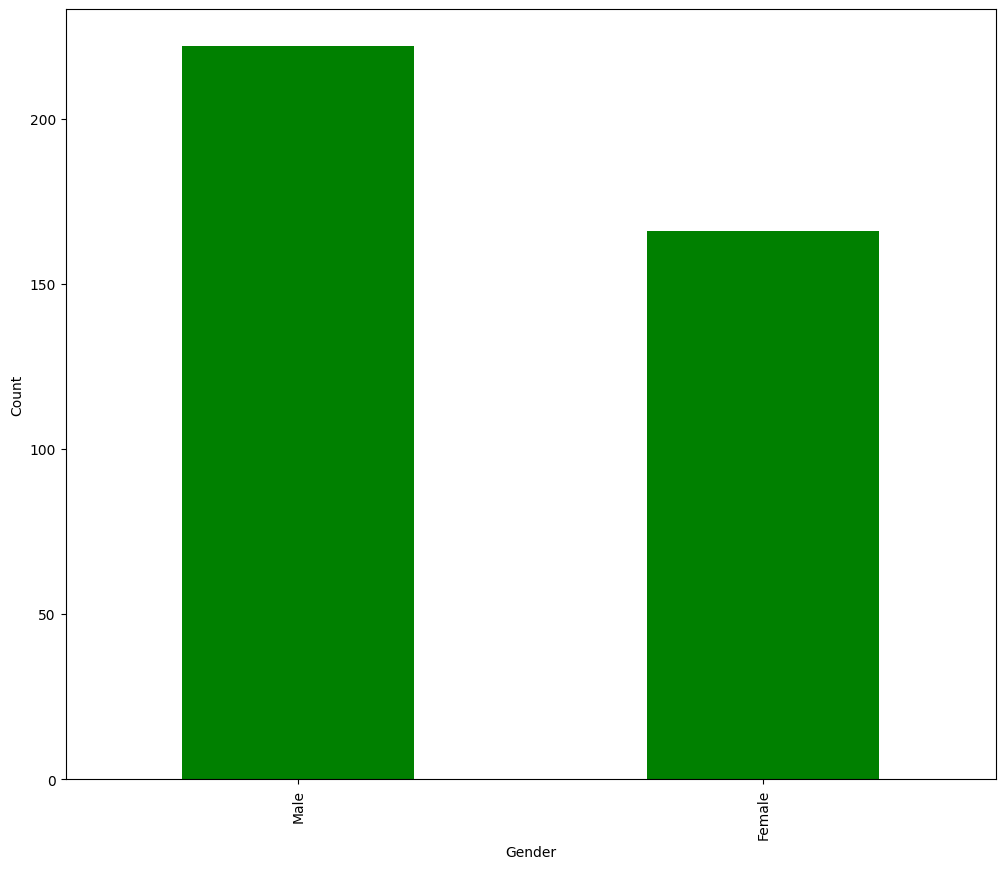

In [16]:
gender.plot(kind = 'bar', figsize = (12,10), color = 'g')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# **MARTIAL STATUS**

In [17]:
Martial = data['Marital Status'].value_counts()

In [18]:
Martial

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

<Axes: ylabel='Marital Status'>

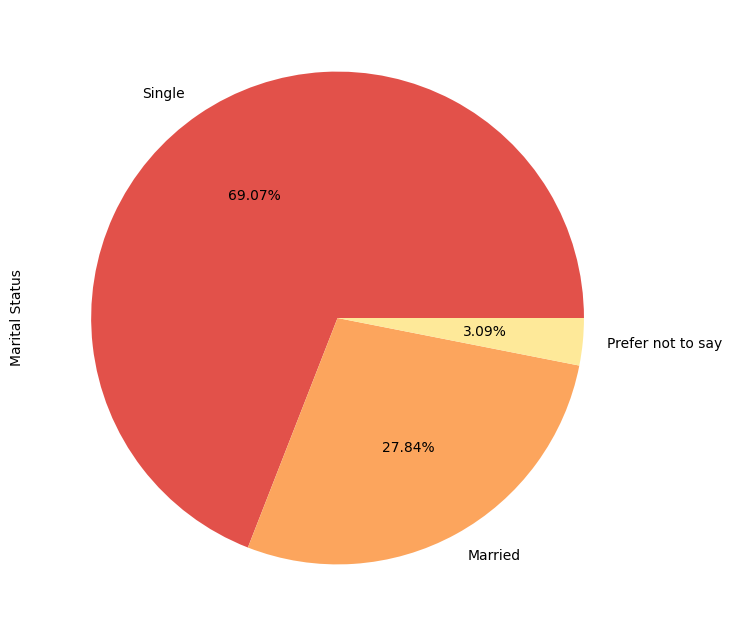

In [19]:
sns.set_palette('Spectral')
Martial.plot(kind = 'pie', autopct = '%1.02f%%', figsize = (10,8))

# **OCCUPATION VS COUNTS**

In [20]:
occupation = data['Occupation'].value_counts()
occupation

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

<Axes: >

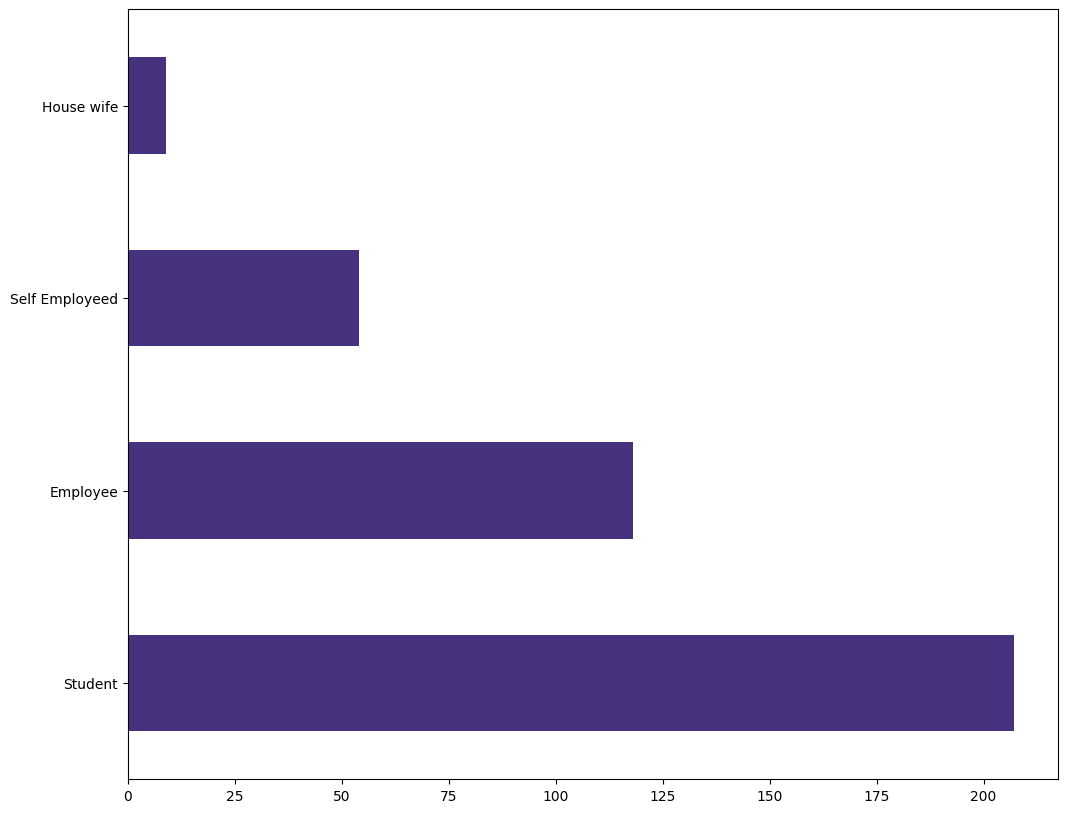

In [21]:
sns.set_palette(palette = 'viridis')
occupation.plot(kind = 'barh',figsize = (12,10))


# **INCOME VS COUNT**

In [22]:
income = data['Monthly Income'].value_counts()


<Axes: >

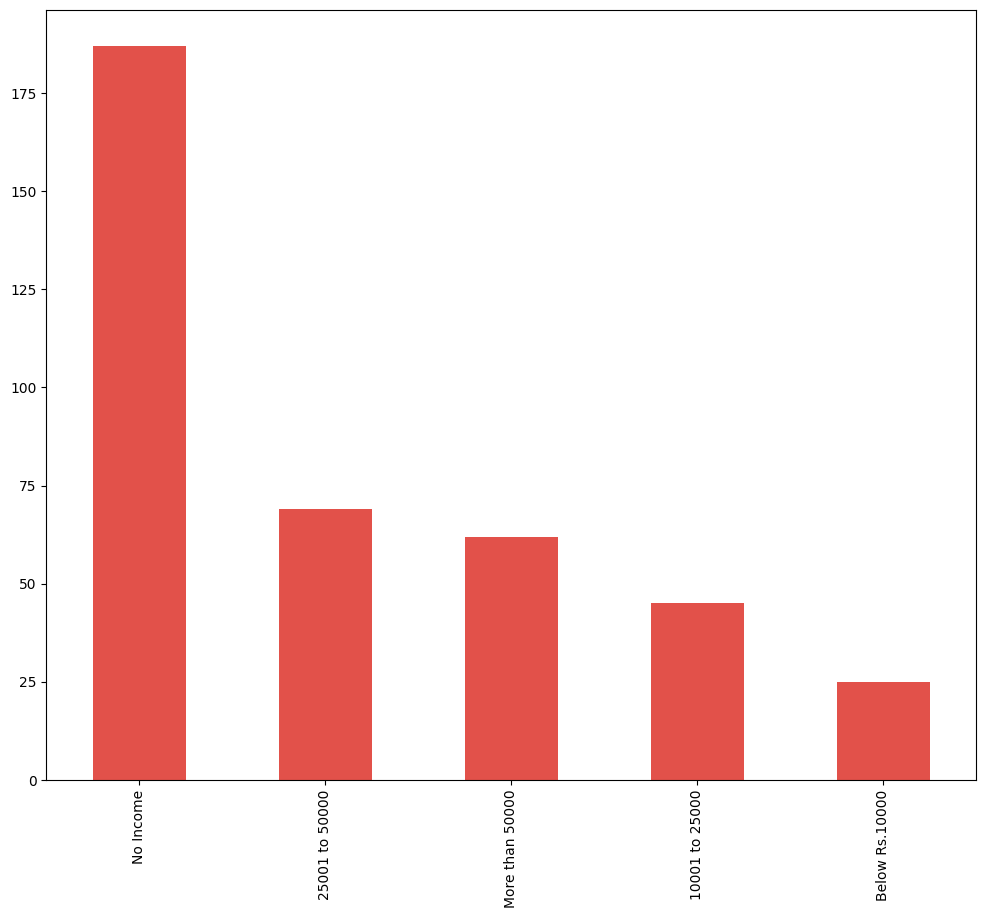

In [23]:
sns.set_palette(palette = 'Spectral')
income.plot(kind = 'bar',figsize = (12,10))

# **Education qualifications**

In [24]:
education = data['Educational Qualifications'].value_counts()
education

Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64

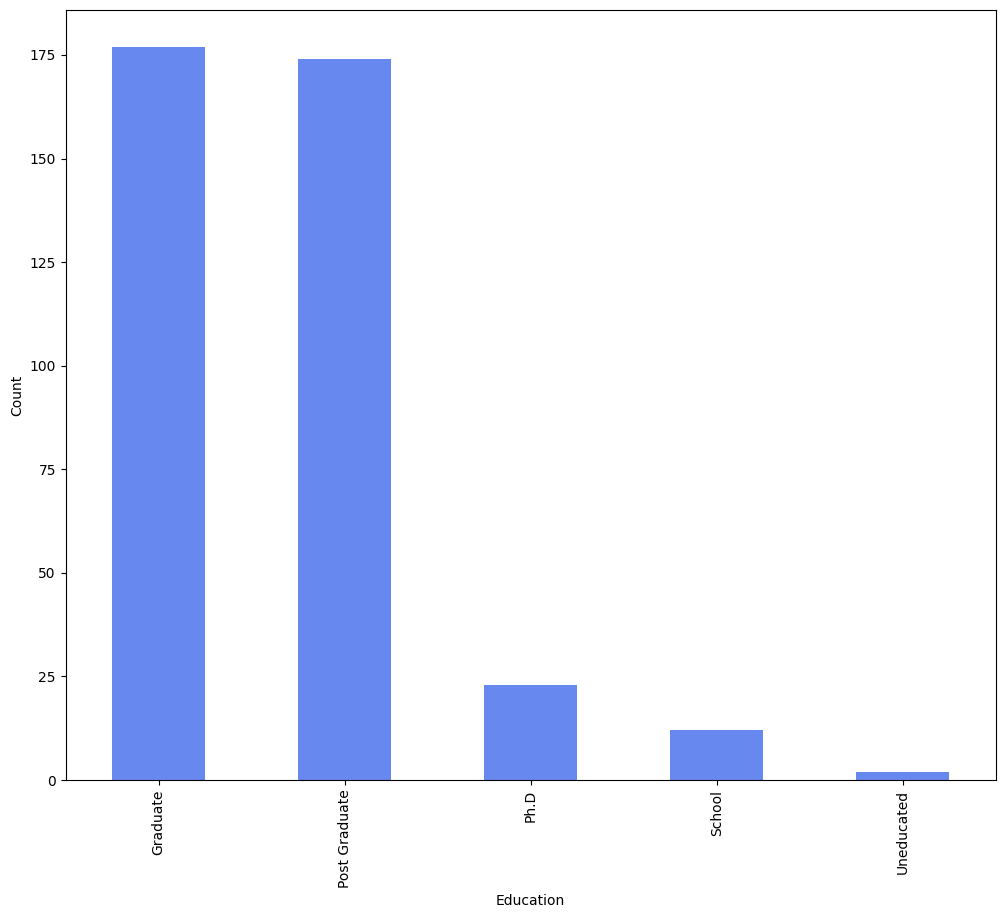

In [37]:
sns.set_palette('coolwarm')
education.plot(kind = 'bar',figsize = (12,10))
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

# **Family size**

In [50]:
size = data['Family size'].value_counts()
size.sort_values(ascending = True)

1     24
6     29
5     54
4     63
2    101
3    117
Name: Family size, dtype: int64

<Axes: >

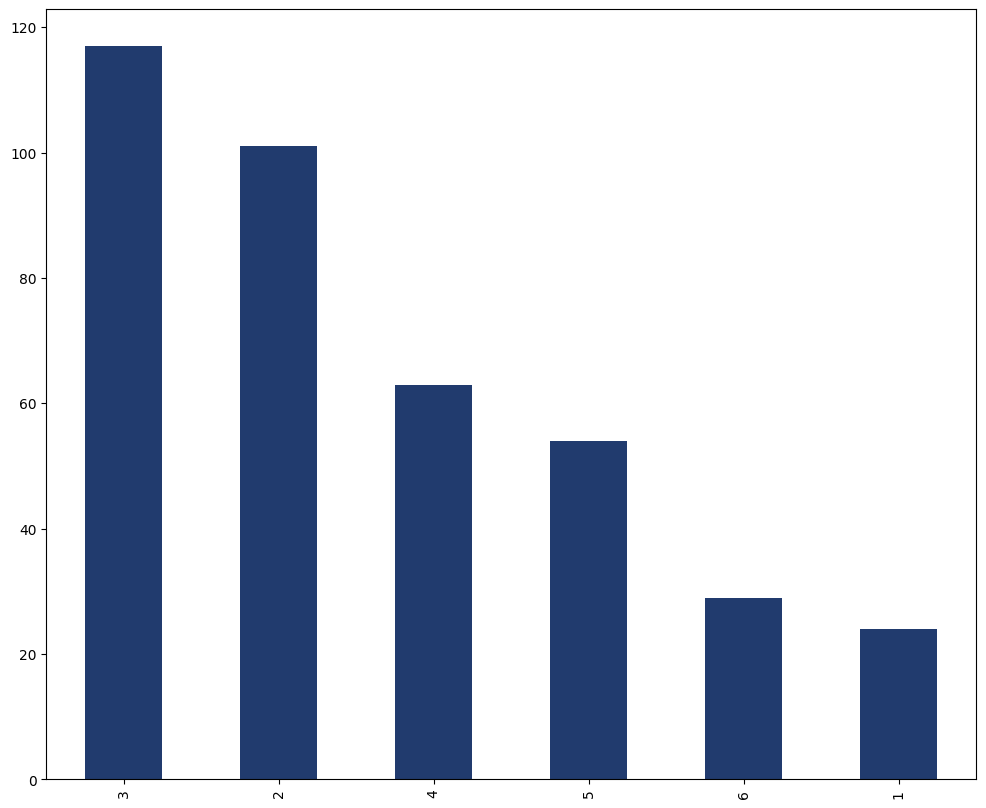

In [56]:
sns.set_palette('cividis')
size.plot(kind = 'bar', figsize = (12,10))


Age vs counts

In [39]:
age = data['Age'].value_counts()
age

23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: Age, dtype: int64

<Axes: >

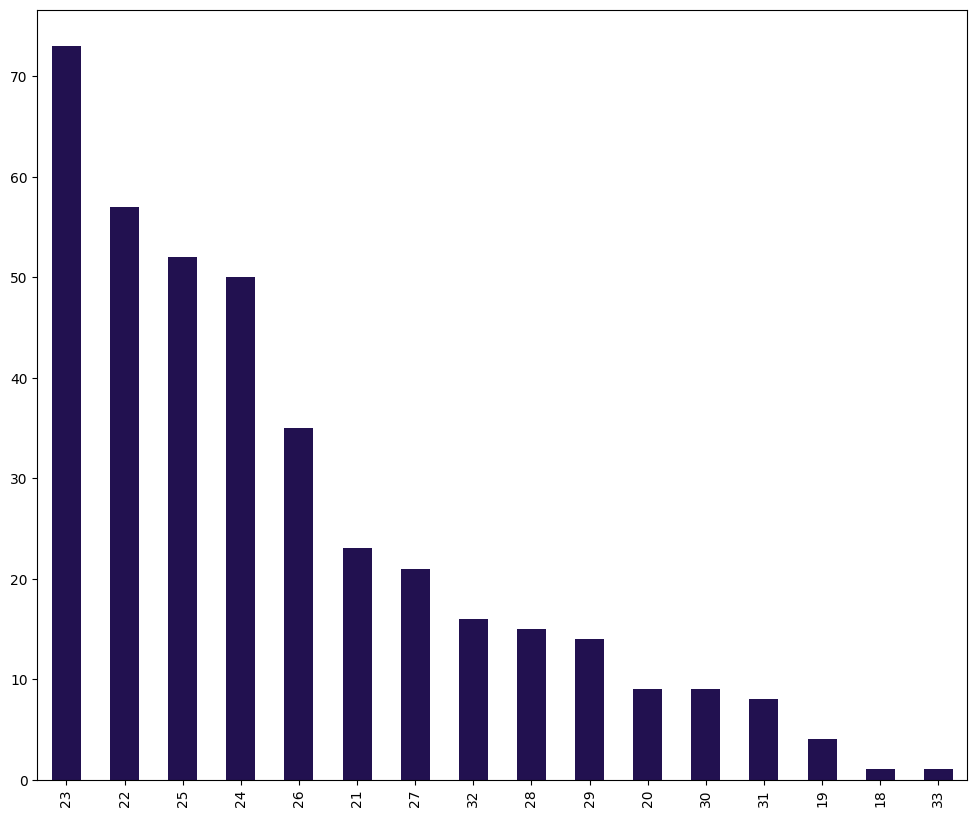

In [60]:
sns.set_palette('magma')
age.plot(kind = 'bar',figsize = (12,10))

In [64]:
pincode = data['Pin code'].value_counts().head(10)

In [65]:
pincode

560009    36
560038    16
560010    14
560076    12
560095    11
560034    11
560036     9
560075     9
560043     8
560029     8
Name: Pin code, dtype: int64